**Module that provides visualization of la liga matches data**

## Libraries

In [1]:
from pathlib import Path # Path manipulation
import os # OS library
from collections import Counter # Dict manipulations
import re # Regular expressions library
from IPython.display import Markdown, display # Style output display in jupyter notebook
from datetime import datetime # datetime manipulation

import pandas as pd # Data import, manipulation and processing 

import matplotlib.pyplot as plt # Graph making

from data_functions import * # Private library of functions related to La Liga Dataset

# Shows matplotlib graphs in the notebook
%matplotlib inline 

## Variables

In [3]:
data_folder = Path("../data")
filename = '03_20_SP.csv'
file_path = data_folder / filename

In [3]:
class LigaException(Exception):
    def __init__(self, function, message):
        self.function = function
        self.message = message
        
    def error_msg(self):
        return 'Error in {} | {}'.format(self.function, self.message)

## Functions

In [4]:
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [ ]:
def read_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.sort_values(by='Date')
    return df

In [5]:
def get_team_matches(df, team):
        home = df.loc[df['HomeTeam'] == team]
        away = df.loc[df['AwayTeam'] == team]
        return pd.concat([home, away])

In [6]:
def get_team_scores(df, team):
    home_dict = {'H' : 'Wins', 'D' : 'Draws', 'A' : 'Loses'}
    away_dict = {'A' : 'Wins', 'D' : 'Draws', 'H' : 'Loses'}
    
    home = df.loc[df['HomeTeam'] == team]['FTR'].value_counts().rename(home_dict).to_dict()
    away = df.loc[df['AwayTeam'] == team]['FTR'].value_counts().rename(away_dict).to_dict()

    total = dict(Counter(home)+Counter(away))

    return total, home, away

In [7]:
def get_points(df, team):
    res = get_team_scores(df, team)
    ret = []
    for x in res:
        ret.append(x['Wins']*3 + x['Draws'])
    return tuple(ret)

In [8]:
def get_season(df, season):
    r = re.compile('.{2}-.{2}')
    if r.match(season) is None:
        raise LigaException('get_season', 'Season format given is incorrect')
        
    tokens = season.split('-')
    if( tokens[0] >= tokens[1]):
        raise LigaException('get_season', 'Start season bigger or equal than end season')
    const_dm = '/07/01'
    season_start = datetime.strptime(('20' + tokens[0] + const_dm), '%Y/%m/%d')
    season_end = datetime.strptime(('20' + tokens[1] + const_dm), '%Y/%m/%d')
    return df.loc[(df['Date'] >= season_start) & (df['Date'] <= season_end)]

In [9]:
def print_team_scores_graph(df, team):
    total, home, away = get_team_scores(df, team)

    # prepare the figure
    rows = 1
    columns = 3
    titles = ['Total', 'Home', 'Away']
    color_dict = {'Wins' : 'g',
                 'Draws' : 'dodgerblue',
                 'Loses' : 'r'}
    f,axes=plt.subplots(rows,columns,figsize=(18,8))
    
    f.suptitle(team, fontsize=16)

    def make_autopct(data):
        def my_autopct(pct):
            total = sum(data.values())
            val = int(round(pct*total/100.0))
            return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
        return my_autopct

    for title, data, ax in zip(titles, [total, home, away], axes):
        ax.set_title(title)
        pie_wedge_collection = ax.pie(data.values(), labels=data.keys(),
                                      shadow = True, explode=[0.1,0.1,0.1],
                                      autopct=make_autopct(data))
        
        for pie_wedge in pie_wedge_collection[0]:
            pie_wedge.set_edgecolor('black')
            pie_wedge.set_facecolor(color_dict[pie_wedge.get_label()])

### Execution

In [4]:
df = read_data(file_path)
df

Date     HomeTeam      AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR  \
0     2003-08-30     Albacete       Osasuna   0.0   2.0    A   0.0   1.0    A   
381   2003-08-30        Cadiz    Poli Ejido   2.0   1.0    H   0.0   0.0    D   
5     2003-08-30     Valencia    Valladolid   1.0   1.0    D   0.0   1.0    A   
4     2003-08-30  Real Madrid         Betis   2.0   1.0    H   1.0   1.0    D   
380   2003-08-30      Almeria      Malaga B   3.0   2.0    H   3.0   1.0    H   
...          ...          ...           ...   ...   ...  ...   ...   ...  ...   
13743 2020-03-08        Betis   Real Madrid   2.0   1.0    H   1.0   1.0    D   
14083 2020-03-08     Tenerife  Ponferradina   1.0   0.0    H   0.0   0.0    D   
8420         NaT          NaN           NaN   NaN   NaN  NaN   NaN   NaN  NaN   
8421         NaT          NaN           NaN   NaN   NaN  NaN   NaN   NaN  NaN   
9264         NaT          NaN           NaN   NaN   NaN  NaN   NaN   NaN  NaN   

       Division  ...  AST    HF    AF   HC   AC   HY   AY   HR   AR   Time  
0             1  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
381           2  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
5             1  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
4             1  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
380           2  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
...         ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...    ...  
13743         1  ...  4.0   8.0  11.0  6.0  2.0  1.0  1.0  0.0  0.0  20:00  
14083         2  ...  1.0  13.0  12.0  7.0  3.0  2.0  0.0  0.0  0.0  19:30  
8420          2  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
8421          2  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  
9264          2  ...  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  

[14084 rows x 23 columns]

In [5]:
df.isnull().sum() #checking for total null values

Date            3
HomeTeam        3
AwayTeam        3
FTHG            3
FTAG            3
FTR             3
HTHG           25
HTAG           25
HTR            25
Division        0
HS           7252
AS           7252
HST          7252
AST          7252
HF           7252
AF           7252
HC           7252
AC           7252
HY           7252
AY           7252
HR           7252
AR           7252
Time        13475
dtype: int64

({'Wins': 21, 'Loses': 12, 'Draws': 5}, {'Wins': 13, 'Loses': 5, 'Draws': 1}, {'Wins': 8, 'Loses': 7, 'Draws': 4})
(87, 48, 39)
(68, 40, 28)


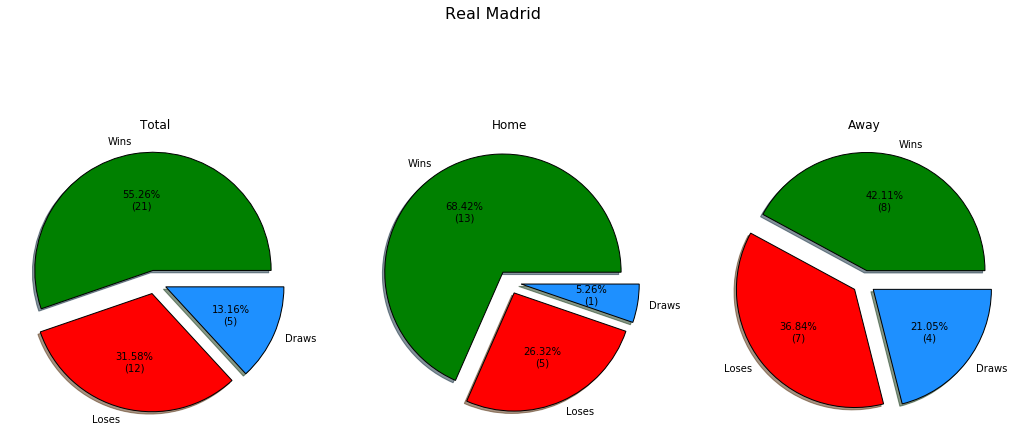

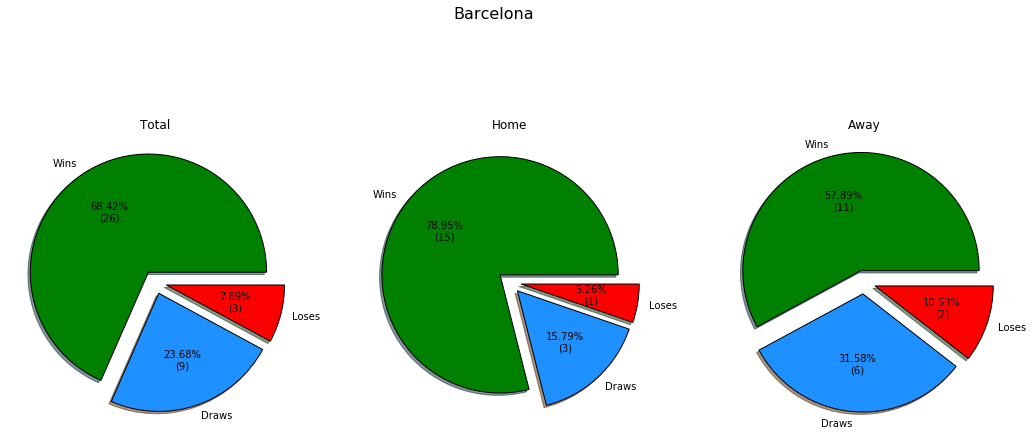

In [6]:
try:
    df_18_19 = get_season(df, '18-19')
except LigaException as e:
    printmd(e.error_msg(),'red')
    
print(get_team_scores(df_18_19, 'Real Madrid'))
print(get_points(df_18_19,'Barcelona'))
print(get_points(df_18_19,'Real Madrid'))
print_team_scores_graph(df_18_19, 'Real Madrid')
print_team_scores_graph(df_18_19, 'Barcelona')